In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trans_mutation_df = pd.read_csv('data/transmutation_df.csv')
delta_correlation_df = pd.read_csv('data/delta_correlation_df.csv')

In [3]:
delta_correlation_df = delta_correlation_df[delta_correlation_df.FDR < 0.05]
delta_correlation_df = delta_correlation_df[['Gene', 'Cancer', 'Delta_Correlation']]
trans_mutation_df = trans_mutation_df.drop(columns = 'Delta_Correlation')
trans_df = pd.merge(trans_mutation_df, delta_correlation_df, how = 'inner')
trans_df

,Gene,P_Value,FDR,Cancer,Mutated_Gene,Delta_Correlation
0,A1CF,0.166994,0.927123,CCRCC,PBRM1,0.192038
1,A1CF,0.904104,0.993714,CCRCC,SETD2,0.192038
2,AADAT,0.583528,0.967151,CCRCC,PBRM1,-0.263372
3,AAGAB,0.210859,0.927123,CCRCC,PBRM1,0.364999
4,AAGAB,0.601195,0.967151,CCRCC,SETD2,0.364999
...,...,...,...,...,...,...
174918,NXPE2,0.630346,0.969772,LUAD,TP53,0.557136
174919,RAB40C,0.098399,0.862486,LUAD,TP53,0.537569
174920,RAB40C,0.085245,0.856123,LUAD,TTN,0.537569
174921,TNS4,0.559251,0.960600,LUAD,TP53,0.983809


In [4]:
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 

0.3333333333333333
2.1
1.0
1.7
3.3


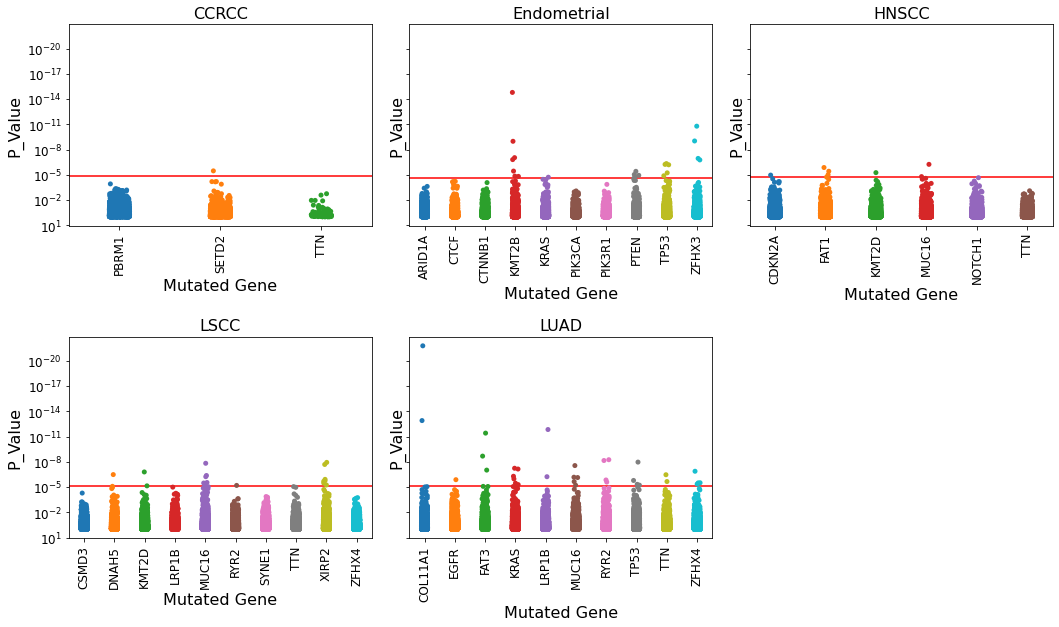

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = True,
                        figsize=(15,9))
cancers = list(pd.unique(trans_df.Cancer))
for ax in axes.flatten():
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = trans_df[trans_df.Cancer == cancer]
    plt.subplot(ax)
    #sns.violinplot(data = df, x = 'Mutated_Gene', y= 'FDR')
    sns.stripplot(data = df, x = 'Mutated_Gene', y= 'P_Value')
    #sns.swarmplot(data = df, x = 'Mutated_Gene', y= 'P_Value')
    plt.axhline(y = 0.05 / len(pd.unique(df.Gene)) , color = 'r')
    plt.title(cancer)
    plt.gca().tick_params(axis = 'x', labelrotation = 90)
    ax.set_xlabel('Mutated Gene')
ax.invert_yaxis()
ax.set_yscale('log')
fig.delaxes(axes[1][2])
fig.tight_layout()
plt.savefig('Figures/Figure 4) Transmutation Effects.png')
plt.show()


In [13]:
trans_df.groupby(['Mutated_Gene', 'Cancer']).apply(lambda x: sum(x.P_Value < 0.05 / len(pd.unique(trans_df.Gene))))

Mutated_Gene  Cancer     
ARID1A        Endometrial    0
CDKN2A        HNSCC          0
COL11A1       LUAD           2
CSMD3         LSCC           0
CTCF          Endometrial    0
CTNNB1        Endometrial    0
DNAH5         LSCC           1
EGFR          LUAD           1
FAT1          HNSCC          2
FAT3          LUAD           3
KMT2B         Endometrial    5
KMT2D         HNSCC          0
              LSCC           1
KRAS          Endometrial    0
              LUAD           6
LRP1B         LSCC           0
              LUAD           2
MUC16         HNSCC          1
              LSCC           5
              LUAD           4
NOTCH1        HNSCC          0
PBRM1         CCRCC          0
PIK3CA        Endometrial    0
PIK3R1        Endometrial    0
PTEN          Endometrial    1
RYR2          LSCC           0
              LUAD           4
SETD2         CCRCC          1
SYNE1         LSCC           0
TP53          Endometrial    3
              LUAD           3
TTN          

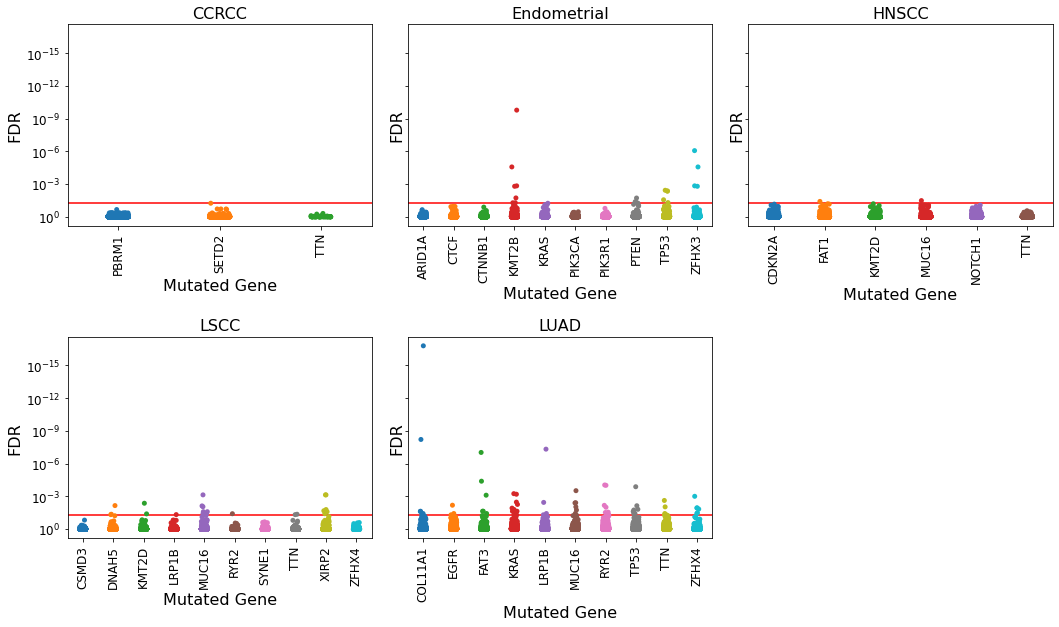

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = True,
                        figsize=(15,9))
cancers = list(pd.unique(trans_df.Cancer))
for ax in axes.flatten():
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = trans_df[trans_df.Cancer == cancer]
    plt.subplot(ax)
    #sns.violinplot(data = df, x = 'Mutated_Gene', y= 'FDR')
    sns.stripplot(data = df, x = 'Mutated_Gene', y= 'FDR')
    #sns.swarmplot(data = df, x = 'Mutated_Gene', y= 'P_Value')
    plt.axhline(y = 0.05 , color = 'r')
    plt.title(cancer)
    plt.gca().tick_params(axis = 'x', labelrotation = 90)
    ax.set_xlabel('Mutated Gene')
ax.invert_yaxis()
ax.set_yscale('log')
fig.delaxes(axes[1][2])
fig.tight_layout()